# Problem definition

#### Problem Statement :Predicting the customer chrun in telecom industry

<img src="images.jpg">

# Creation of base dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
base_dataset=pd.read_csv(r"C:\Sridhar\AI_ML\Algorithms\datasets\Telco-Customer-Churn.csv")
base_dataset.head(2)
df=base_dataset

In [2]:
base_dataset.shape

(7043, 21)

# Pre Processing

## Memory management 

In [3]:
""" iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
"""
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.describe().columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))    

Memory usage of dataframe is 1.13 MB
Memory usage after optimization is: 0.99 MB
Decreased by 11.9%


## Null value treatment 

In [4]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    # null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    # null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    #if any variable as null value greater than input(like 30% of the data) 
    #value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [5]:
base_dataset_1,cat,cont=null_values(base_dataset)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
30
30
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
base_dataset_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.84375,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.93750,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.84375,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.31250,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.68750,151.65,Yes


In [7]:
cat

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
base_dataset_1.var().sort_values().index

In [8]:
for i in cat:
    if i != 'MachineIdentifier':
        print("{} : {}".format(i,base_dataset_1[i].nunique()))
#         print(i+" : "+df_train_data[i].nunique())

customerID : 7043
gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
TotalCharges : 6531
Churn : 2


## Outlier treatment 

In [38]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[0:10]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        #"""Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i]=y

In [39]:
outliers_transform(base_dataset_1)

## Label encoders 

In [40]:
base_dataset_1.drop('customerID',axis=1,inplace=True)

In [41]:
dummy_columns=[]
for i in base_dataset_1.columns:
    if (base_dataset_1[i].nunique()>=3) & (base_dataset_1[i].nunique()<5):
        dummy_columns.append(i)

In [42]:
dummy_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [43]:
dummies_tables=pd.get_dummies(base_dataset_1[dummy_columns])

In [44]:
dummies_tables.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [45]:
for i in dummies_tables.columns:
    base_dataset_1[i]=dummies_tables[i]

In [46]:
base_dataset_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,...,1,0,0,1,0,0,0,0,1,0
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,...,1,0,0,0,1,0,0,0,0,1
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,...,1,0,0,1,0,0,0,0,0,1
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,0,0,1,0,1,0,0,0
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,...,1,0,0,1,0,0,0,0,1,0


In [47]:
base_dataset_1=base_dataset_1.drop(dummy_columns,axis=1)

In [48]:
base_dataset_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0.0,Yes,No,1,No,Yes,29.84375,29.85,No,...,1,0,0,1,0,0,0,0,1,0
1,Male,0.0,No,No,34,Yes,No,56.93750,1889.5,No,...,1,0,0,0,1,0,0,0,0,1
2,Male,0.0,No,No,2,Yes,Yes,53.84375,108.15,Yes,...,1,0,0,1,0,0,0,0,0,1
3,Male,0.0,No,No,45,No,No,42.31250,1840.75,No,...,1,0,0,0,1,0,1,0,0,0
4,Female,0.0,No,No,2,Yes,Yes,70.68750,151.65,Yes,...,1,0,0,1,0,0,0,0,1,0


In [49]:
cat=base_dataset_1.describe(include='object').columns

In [50]:
cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder
def label_encoders(data,cat):
    le=LabelEncoder()
    for i in cat:
        le.fit(data[i])
        x=le.transform(data[i])
        data[i]=x
    return data

In [52]:
data=base_dataset_1
cat=base_dataset_1.describe(include='object').columns

In [53]:
label_encoders(base_dataset_1,cat).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,0,1,0,1,29.84375,2505,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0.0,0,0,34,1,0,56.93750,1466,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0.0,0,0,2,1,1,53.84375,157,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0.0,0,0,45,0,0,42.31250,1400,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0.0,0,0,2,1,1,70.68750,925,1,...,1,0,0,1,0,0,0,0,1,0


In [54]:
base_dataset_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

## Univariate analysis (EDA) 

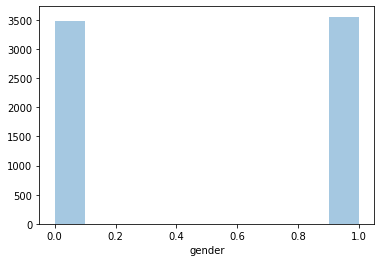

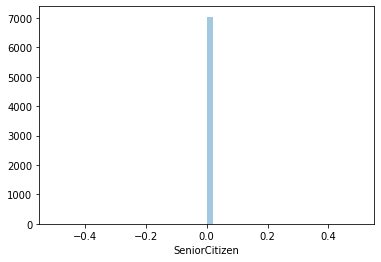

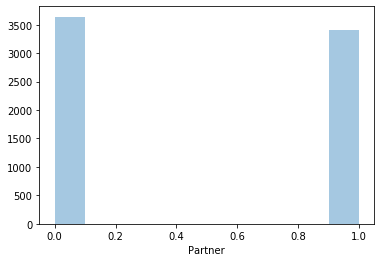

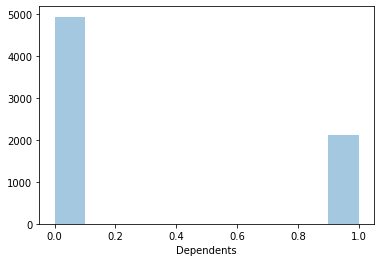

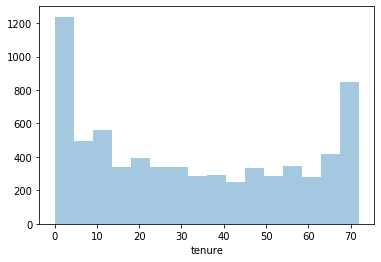

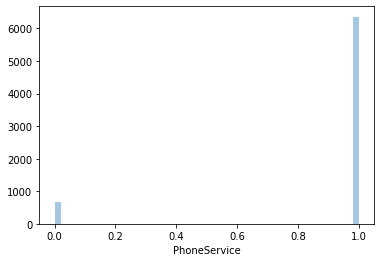

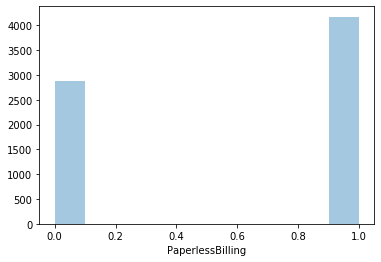

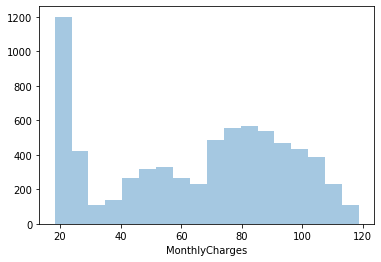

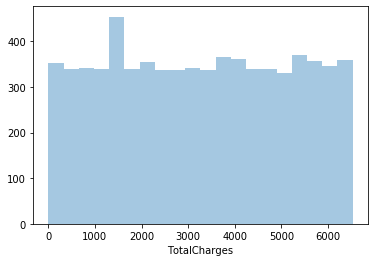

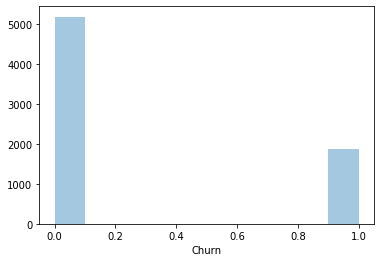

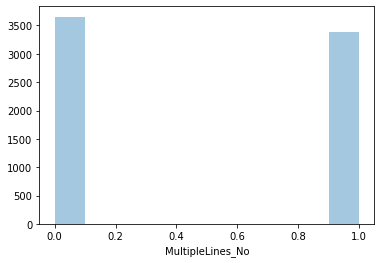

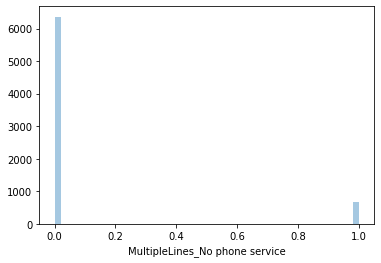

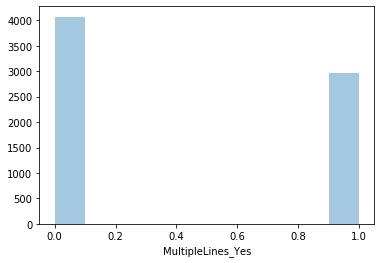

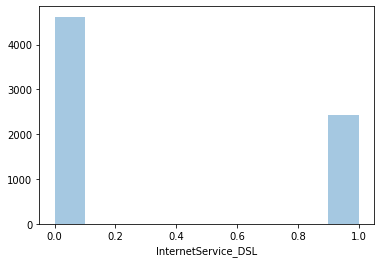

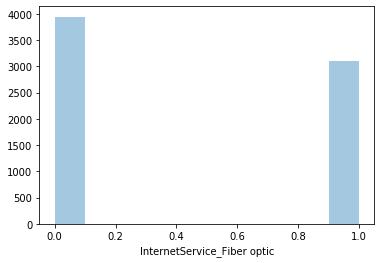

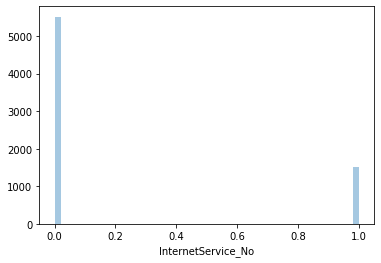

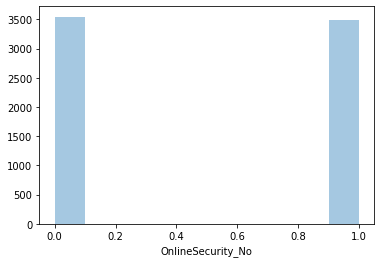

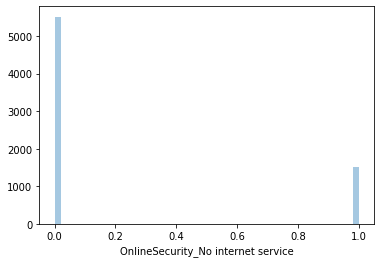

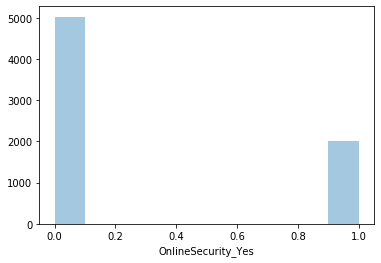

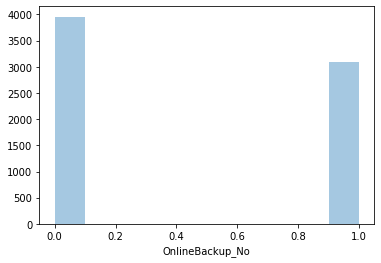

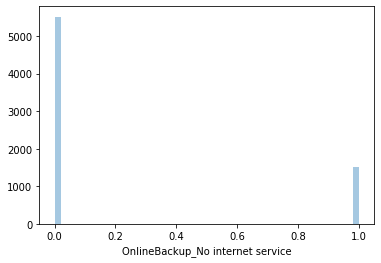

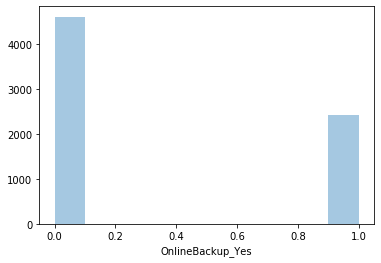

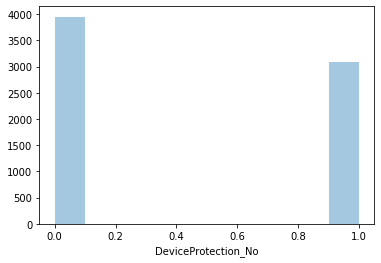

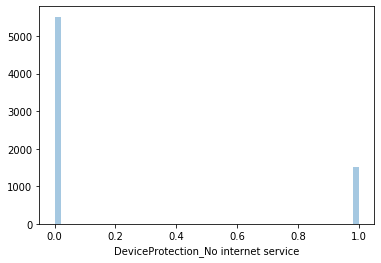

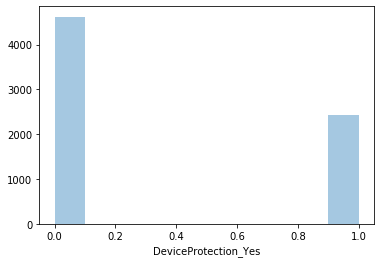

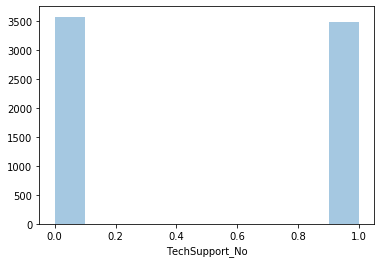

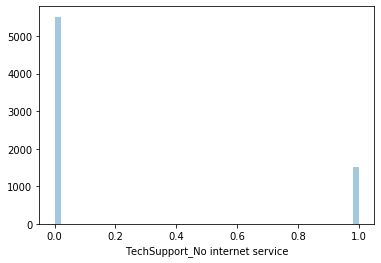

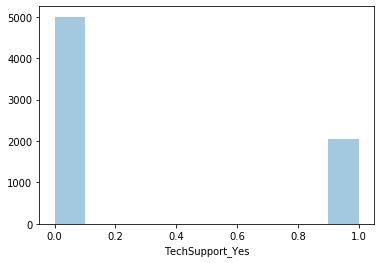

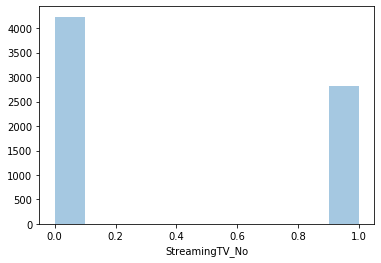

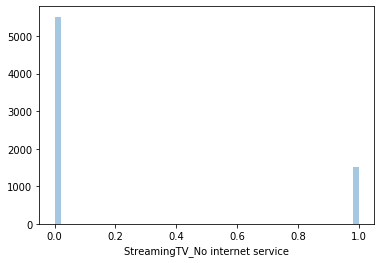

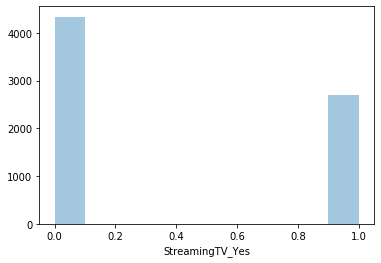

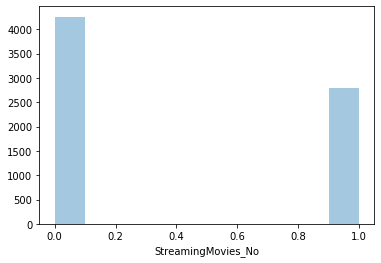

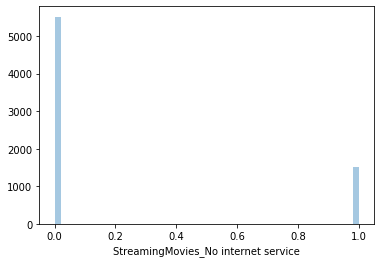

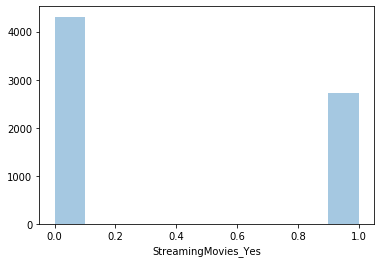

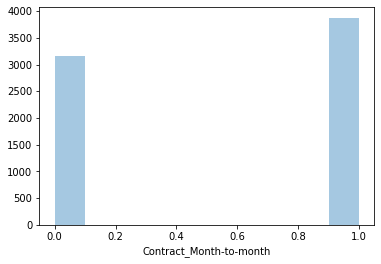

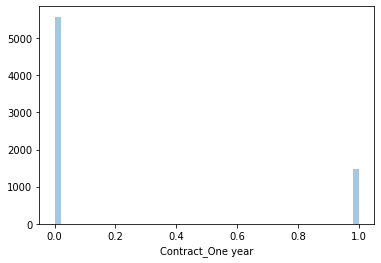

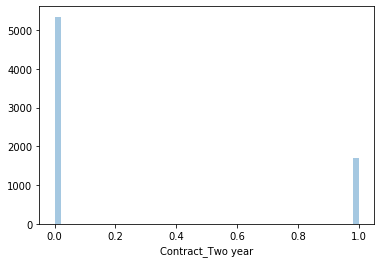

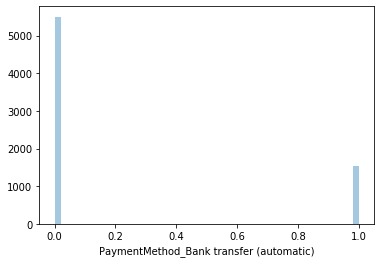

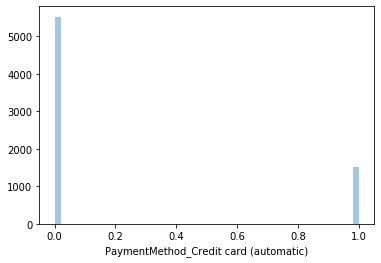

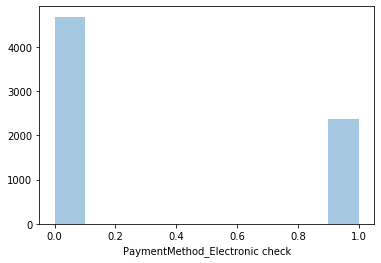

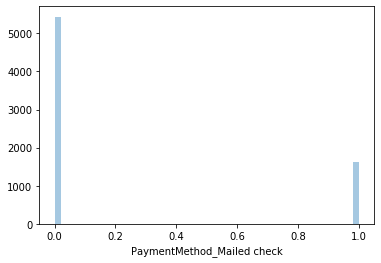

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in base_dataset_1.var().index:
    sns.distplot(base_dataset_1[i],kde=False)
    plt.show()

## 	Bivariate analysis (EDA)

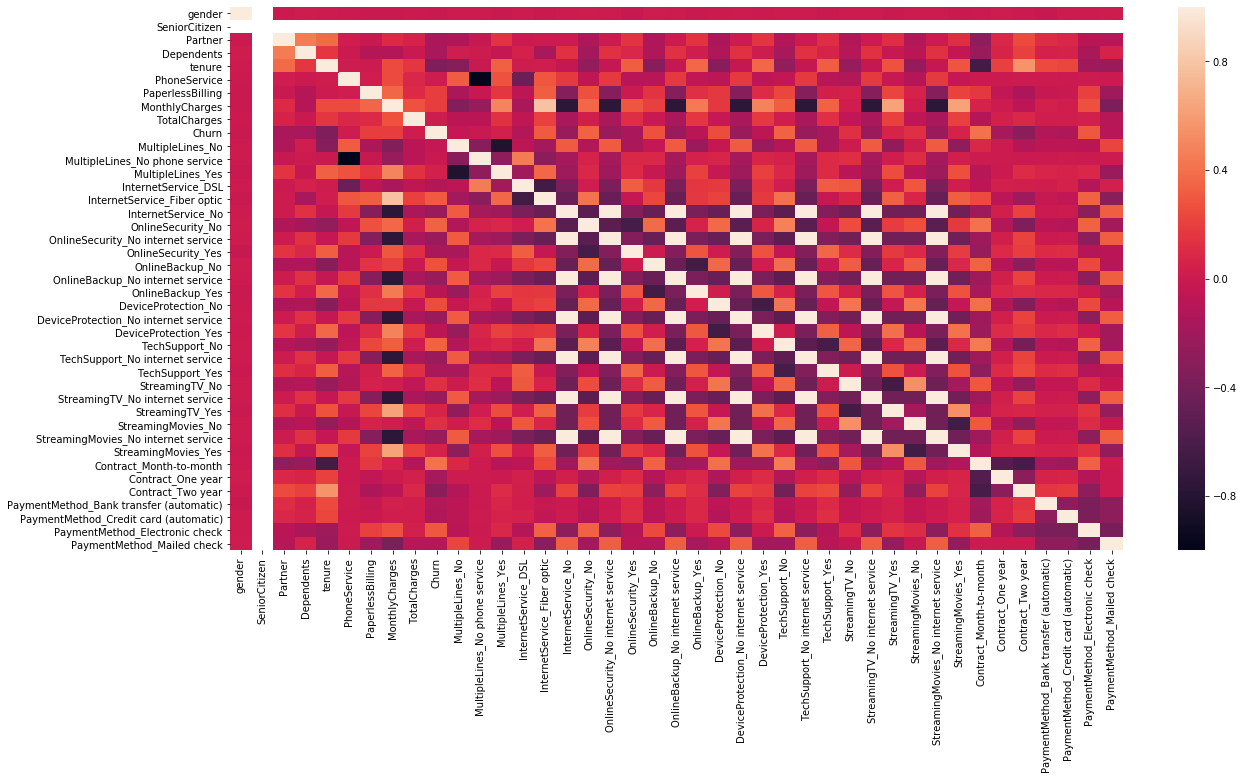

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(base_dataset_1.corr())

# Model Building

## Supervised

 ### Classification

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [61]:
y=base_dataset_1['Churn']
x=base_dataset_1.drop('Churn',axis=1)

pandas.core.series.Series

In [62]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

In [65]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5634, 40) (1409, 40) (5634,) (1409,)


In [88]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),BaggingClassifier(),]

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score
final_accuracy_scores=[]
for i in models:
    dt=i
    dt.fit(X_train,y_train)
    dt.predict(X_test)
    dt.predict(X_train)
    print(confusion_matrix(y_test,dt.predict(X_test)))
    print(accuracy_score(y_test,dt.predict(X_test)))
    print(confusion_matrix(y_train,dt.predict(X_train)))
    print(accuracy_score(y_train,dt.predict(X_train)))
    print(i)
    final_accuracy_scores.append([i,confusion_matrix(y_test,dt.predict(X_test)),accuracy_score(y_test,dt.predict(X_test)),confusion_matrix(y_train,dt.predict(X_train)),accuracy_score(y_train,dt.predict(X_train))])
    from sklearn.model_selection import cross_val_score
    print(cross_val_score(i,X_train,y_train,cv=10))

[[839 200]
 [179 191]]
0.7310149041873669
[[4134    1]
 [  12 1487]]
0.9976925807596734
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
[0.71453901 0.73758865 0.7393617  0.70390071 0.71276596 0.69804618
 0.77264654 0.73001776 0.74245115 0.72241993]
[[936 103]
 [207 163]]
0.7799858055358411
[[4118   17]
 [  99 1400]]
0.9794107206247782
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
          

In [96]:
final_accuracy_scores=pd.DataFrame(final_accuracy_scores)

In [97]:
final_accuracy_scores

,0,1,2,3,4
0,"DecisionTreeClassifier(class_weight=None, crit...","[[828, 211], [176, 194]]",0.725337,"[[4134, 1], [12, 1487]]",0.997693
1,"(DecisionTreeClassifier(class_weight=None, cri...","[[930, 109], [207, 163]]",0.775727,"[[4119, 16], [96, 1403]]",0.980121
2,"(DecisionTreeClassifier(class_weight=None, cri...","[[919, 120], [187, 183]]",0.782115,"[[4116, 19], [77, 1422]]",0.982961


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt.predict(X_test))

0.7189496096522356

## Unsupervised

### Hierarchical  clustering

### Centre based clustering 

## Time Series

### ARIMA

### ARIMAX

# Model validation 

## Supervised

### Regression

### Classification

## Unsupervised

### Hierarchical  clustering

### Centre based clustering 

## Time Series

### ARIMA

### ii.	ARIMAX

# 	Model Fine-tuning

##	Feature Engineering 

#	Model Deployment

##	Local Host

##	AWS

##	H20.ai